# Pymaceuticals Inc.
---

### Analysis

- On this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

After reviewing the data we found that a mice have duplicate data, so we proceed to delete the mice g989. As a result we have 248 mice.


We found that the mice treated with Ketapril have the biggest tumor by average of the rest. Otherwise the ones treated with Ramicane have smaller tumor by average.

We selected Capomulin as the drug of interest because is the one with more number of observed mouse timepoints 230 mice. The lowest observations were the mice treatment with propriva 148 mice.

We also can observed that we have a good distribution within the gender of the mice 51% male and 49% female.

A correlation coefficient of 0.84 indicates a strong positive correlation between mouse weight and the average tumor volume. In this case, a correlation coefficient of 0.84 suggests that as the mouse weight increases, the average tumor volume tends to increase as well. The positive correlation indicates that there is a tendency for heavier mice to have larger average tumor volumes.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
num_mice = data_df["Mouse ID"].unique()
num_mice=len(num_mice)
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df[data_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = data_df[data_df['Mouse ID'] == duplicate_mice[0]]
duplicate_mouse_data.head(13)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df.drop(data_df[data_df['Mouse ID'] == "g989"].index)
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = clean_df["Mouse ID"].unique()
num_mice2=len(num_mice2)
num_mice2

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_data = clean_df.groupby('Drug Regimen')

mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume})

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem')

summary_stats_df_agg

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

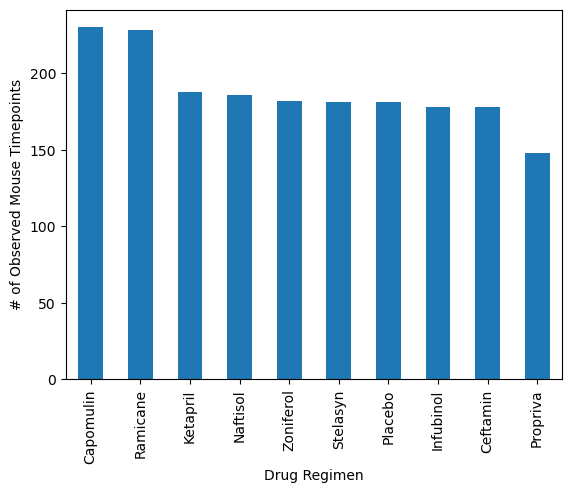

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_regimen = clean_df['Drug Regimen'].value_counts()
count_per_regimen.plot(kind='bar')
count_per_regimen
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

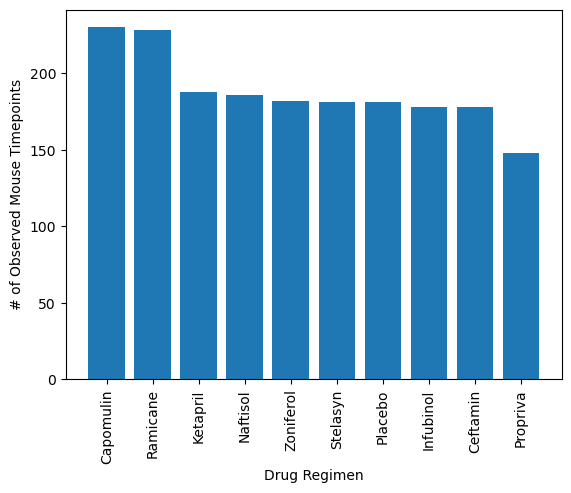

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_per = clean_df['Drug Regimen'].value_counts()

plt.bar(count_per.index, count_per)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')

plt.show()

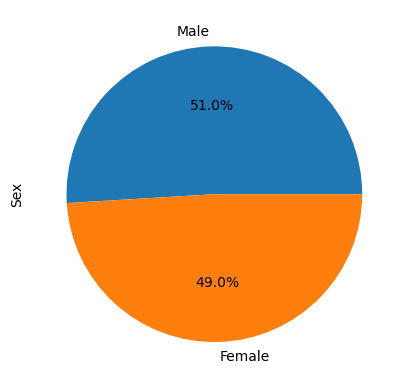

Male      958
Female    922
Name: Sex, dtype: int64

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_per_sex = clean_df['Sex'].value_counts()
count_per_sex.plot(kind='pie', autopct='%1.1f%%')
plt.show()
count_per_sex

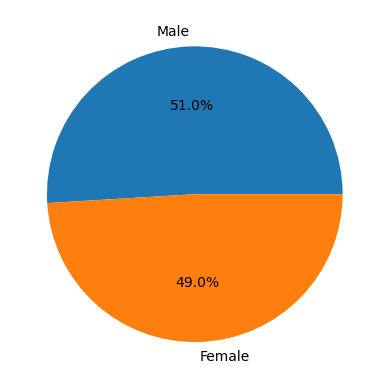

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(count_per_sex, labels=count_per_sex.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor_volume = pd.merge(clean_df, last_timepoint, on=['Mouse ID'], how='outer')

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = max_tumor_volume[max_tumor_volume['Drug Regimen'].isin(treatment_regimens)]
final_tumor_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 1879
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            814 non-null    object 
 1   Timepoint_x         814 non-null    int64  
 2   Tumor Volume (mm3)  814 non-null    float64
 3   Metastatic Sites    814 non-null    int64  
 4   Drug Regimen        814 non-null    object 
 5   Sex                 814 non-null    object 
 6   Age_months          814 non-null    int64  
 7   Weight (g)          814 non-null    int64  
 8   Timepoint_y         814 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 63.6+ KB


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and determine potential outliers for each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = clean_df.loc[clean_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the tumor_vol_data list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR for the current treatment regimen
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] -(quartiles[0.75] - quartiles[0.25]) * 1.5
    upper_bound = quartiles[0.75] +(quartiles[0.75] - quartiles[0.25]) *1.5
    
    # Determine potential outliers for the current treatment regimen
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print the potential outliers for the current treatment regimen
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: 1699    25.472143
1700    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 514    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


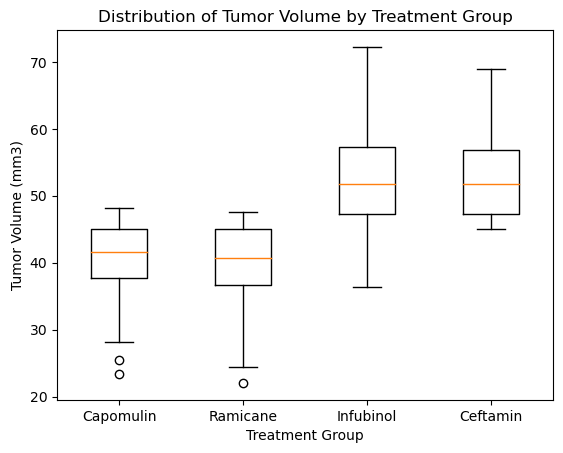

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_data = [
    final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)'],
    final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)'],
    final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)'],
    final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']]

fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

ax.set_title('Distribution of Tumor Volume by Treatment Group')
ax.set_xlabel('Treatment Group')
ax.set_ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

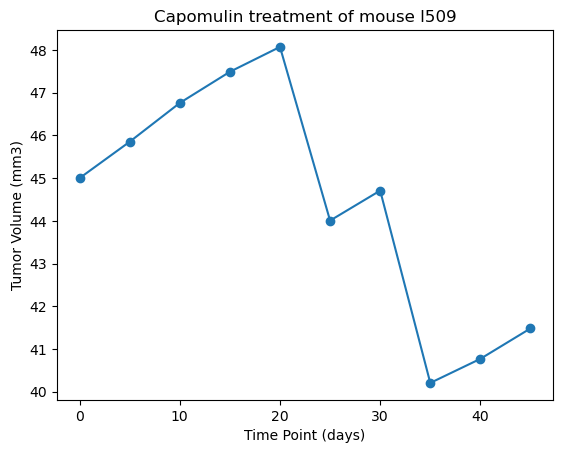

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
single_mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

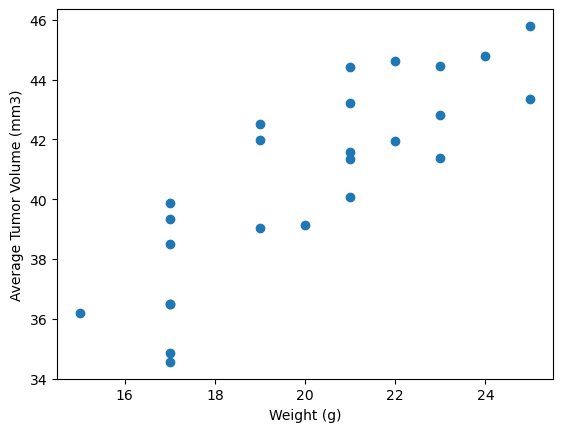

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


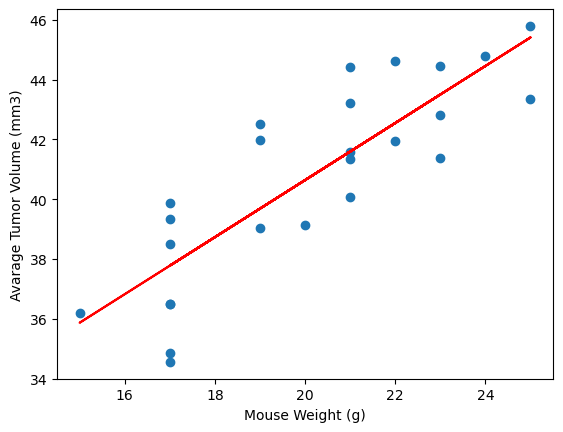

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cor_coef, _ = st.pearsonr(mouse_weight, average_tumor_volume)
slope, intercept,rvalue, pvalue, stderr = st.linregress(mouse_weight, average_tumor_volume)

plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, intercept + slope * mouse_weight, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avarage Tumor Volume (mm3)')

print(f"The correlation between mouse weight and the average tumor volume is {round(cor_coef,2)}")
plt.show()